In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit


def magphase_old(D, *, power=1):
    mag = np.abs(D)
    mag **= power
    phase = np.exp(1.0j * np.angle(D))
    return mag, phase

def magphase_new(D, *, power=1):
    mag = np.abs(D)
    zeros_to_ones = mag == 0
    mag_nonzero = mag + zeros_to_ones
    phase = D.imag / mag_nonzero * 1.0j
    phase += D.real / mag_nonzero + zeros_to_ones
    mag **= power
    return mag, phase

1: old 6.2355240200122355e-06 new 8.163305789930745e-06
9: old 7.351809160027187e-06 new 8.805067380017135e-06
100: old 1.3869442440045532e-05 new 1.0588623239891603e-05
961: old 9.519148109975504e-05 new 2.710818339983234e-05
10000: old 0.0009980572030035546 new 0.00024247488800028806
99856: old 0.0106536581000546 new 0.0031499229799374006
1000000: old 0.1021500887000002 new 0.03633526360063115
9998244: old 1.0096370789993672 new 0.34205444119870665


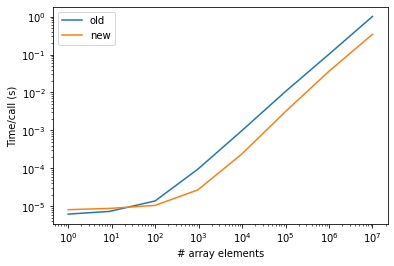

In [2]:
def performance():
    n = []
    t_old = []
    t_new = []

    for d in (1, 3, 10, 31, 100, 316, 1000, 3162):
        D = (np.random.uniform(-1.0, 1.0, (d, d)) + 1.0j * np.random.uniform(-1.0, 1.0, (d, d))).astype(np.complex128)

        n.append(d * d)

        timer = timeit.Timer(stmt='magphase_old(D)', globals={'magphase_old': magphase_old, 'D': D})
        number, _ = timer.autorange()
        t_old.append(min(timer.repeat(repeat=3, number=number)) / number)

        timer = timeit.Timer(stmt='magphase_new(D)', globals={'magphase_new': magphase_new, 'D': D})
        number, _ = timer.autorange()
        t_new.append(min(timer.repeat(repeat=3, number=number)) / number)
        
        print(f"{d * d}: old {t_old[-1]} new {t_new[-1]}")

    plt.loglog(n, t_old)
    plt.loglog(n, t_new)
    plt.xlabel('# array elements')
    plt.ylabel('Time/call (s)')
    plt.legend(['old', 'new'])
    plt.show()

performance()

In [3]:
def accuracy():
    d = 100
    for a in (1e-46, 1e-45, 1e-44, 1e-33, 1e-22, 1e-11, 1e-6, 1.0, 1e6, 1e12, 1e18, 1e24, 1e25, 1e26):
        D = (np.random.uniform(-a, a, (d, d)) + 1.0j * np.random.uniform(-a, a, (d, d))).astype(np.complex64)

        m, p = magphase_old(D)
        rms_old = np.sqrt((np.abs(m * p - D) ** 2).mean())
        m, p = magphase_new(D)
        rms_new = np.sqrt((np.abs(m * p - D) ** 2).mean())
        print(f"{a}: old {rms_old} new {rms_new}")

accuracy()

1e-46: old 0.0 new 0.0
1e-45: old 0.0 new 0.0
1e-44: old 0.0 new 0.0
1e-33: old 0.0 new 0.0
1e-22: old 0.0 new 0.0
1e-11: old 5.557445515674136e-19 new 1.1332819001555726e-19
1e-06: old 5.666874372642523e-14 new 1.3724302049640189e-14
1.0: old 5.5992956049522036e-08 new 1.4042211837761442e-08
1000000.0: old 0.05574551969766617 new 0.012552504427731037
1000000000000.0: old 56274.5078125 new 11915.630859375
1e+18: old 55660879872.0 new 10232274944.0
1e+24: old 5.556972139472486e+16 new 1.0282120568111104e+16
1e+25: old inf new 1.3731339439806874e+17
1e+26: old inf new inf


.../lib/python3.6/site-packages/numpy/core/_methods.py:160: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
.../lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in square
  import sys
